# **Modelo de Ising com Numba**

In [ ]:
## IMPORTS ##
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import numba


from numpy.random import random as npr
from numba import jit 
from numpy.random import default_rng

In [ ]:
L = 16 # L = tamanho da rede
L2 = L**2
S = np.array(rd.choices([-1,1], k=L2), dtype=np.float32)

In [ ]:
## PARAMETROS ##
# seeds para os rng
rd.seed(42)
np.random.seed(42)
rng = default_rng(seed=42)


# TMAX = tempo de simulação
TMAX = 10**3

# s = matriz da rede 
s = S.copy() #np.array(rd.choices([-1,1], k=L2), dtype=np.float32)

# mag = magnitude 
mag = np.sum(s)/L2

medidas_mag = np.zeros(TMAX, dtype=np.float32) # vetor com as medidas da magnitude
medidas_en = np.zeros(TMAX, dtype=np.float32)  # vetor com as medidas da energia



# # TEMP = array com as temperaturas 
TEMP = np.array([2.269], dtype=np.float32)

In [ ]:
## INICIANDO ##

# viz = matriz de vizinhos
@jit(nopython=True)
def init_viz(L2):
    viz = np.zeros((L2,4),dtype=numba.int64)
    for sitio in range(L2):
        n1 = ((sitio//L -1 +L2)%L)*L + sitio%L
        n2 = ((sitio//L)%L)*L+(sitio+1+L)%L
        n3 = ((sitio//L +1 +L2)%L)*L +sitio%L
        n4 = ((sitio//L)%L)*L+(sitio-1+L)%L
    
        viz[sitio][0] = n1
        viz[sitio][1] = n2
        viz[sitio][2] = n3
        viz[sitio][3] = n4
    return viz

In [ ]:
## DINÂMICA ##

# função da dinâmica de MC
@jit(nopython=True)
def dinamica(s, medidas_mag, medidas_en):
    for temp in TEMP:
        E = 0 
        mag = np.sum(s)/L2 # definimos a mag dentro do loop com numba
        viz = init_viz(L2)  # iniciamos os vizinhos
        for i in range(L2):
          for j in range(4):
            E = E + s[i]*(s[viz[i][j]])
        E = E*(-1/2)       
        for t in range(TMAX):
            # rotina da dinamica
            for i in range(L2):
                sitio = np.random.randint(L2) # vou escolher um sitio aleatorio
                deltae = 2*s[sitio]*(s[viz[sitio,0]] + s[viz[sitio,1]] +s[viz[sitio,2]]+s[viz[sitio,3]])
                prob = np.exp(-deltae/temp)
                rfloat1 = npr(1)[0]  # num aleatorio [0,1) | npr() = numpy.random.random()
                if rfloat1 < prob: # if para flipar o sitio
                    s[sitio] = s[sitio]*(-1)
                    mag = mag + 2*s[sitio] # ajustamo a mag
                    E = E + deltae
            if t > 10**5:
              medidas_mag[t] = mag # salvando o valor da mag do passo t 
              medidas_en[t] = E    # salvando o valor da energia no passo t

In [ ]:
dinamica(s, medidas_mag, medidas_en)

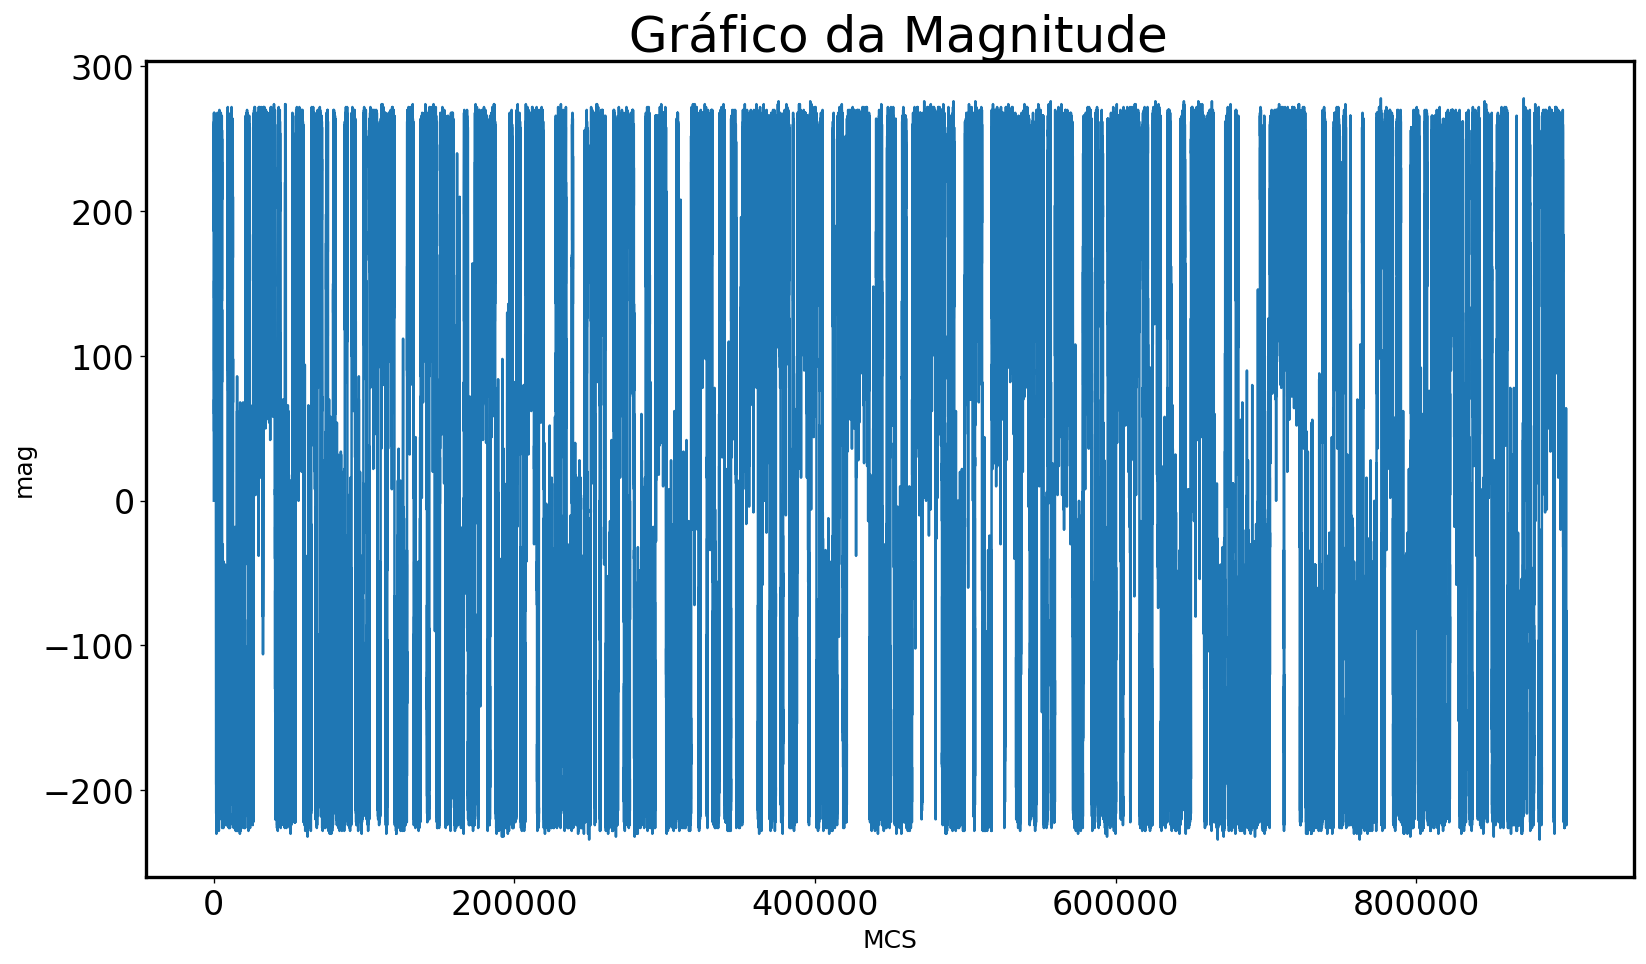

In [ ]:
#@title Gráfico da Magnitude
## PLOT MAG ##
#configs
#-------------------------- PLT CONFIGS ----------------------------------------
fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.title(' Gráfico da Magnitude', fontsize=30)
plt.xlabel('MCS', fontsize=15)
plt.ylabel('mag', fontsize=15)

#---------------------- CHART CONFIGURATION ------------------------------------
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)



#plt.xlim(-1,10e5)
plt.plot(medidas_mag[10**5:], label='mag') #[10**4:]
plt.show()

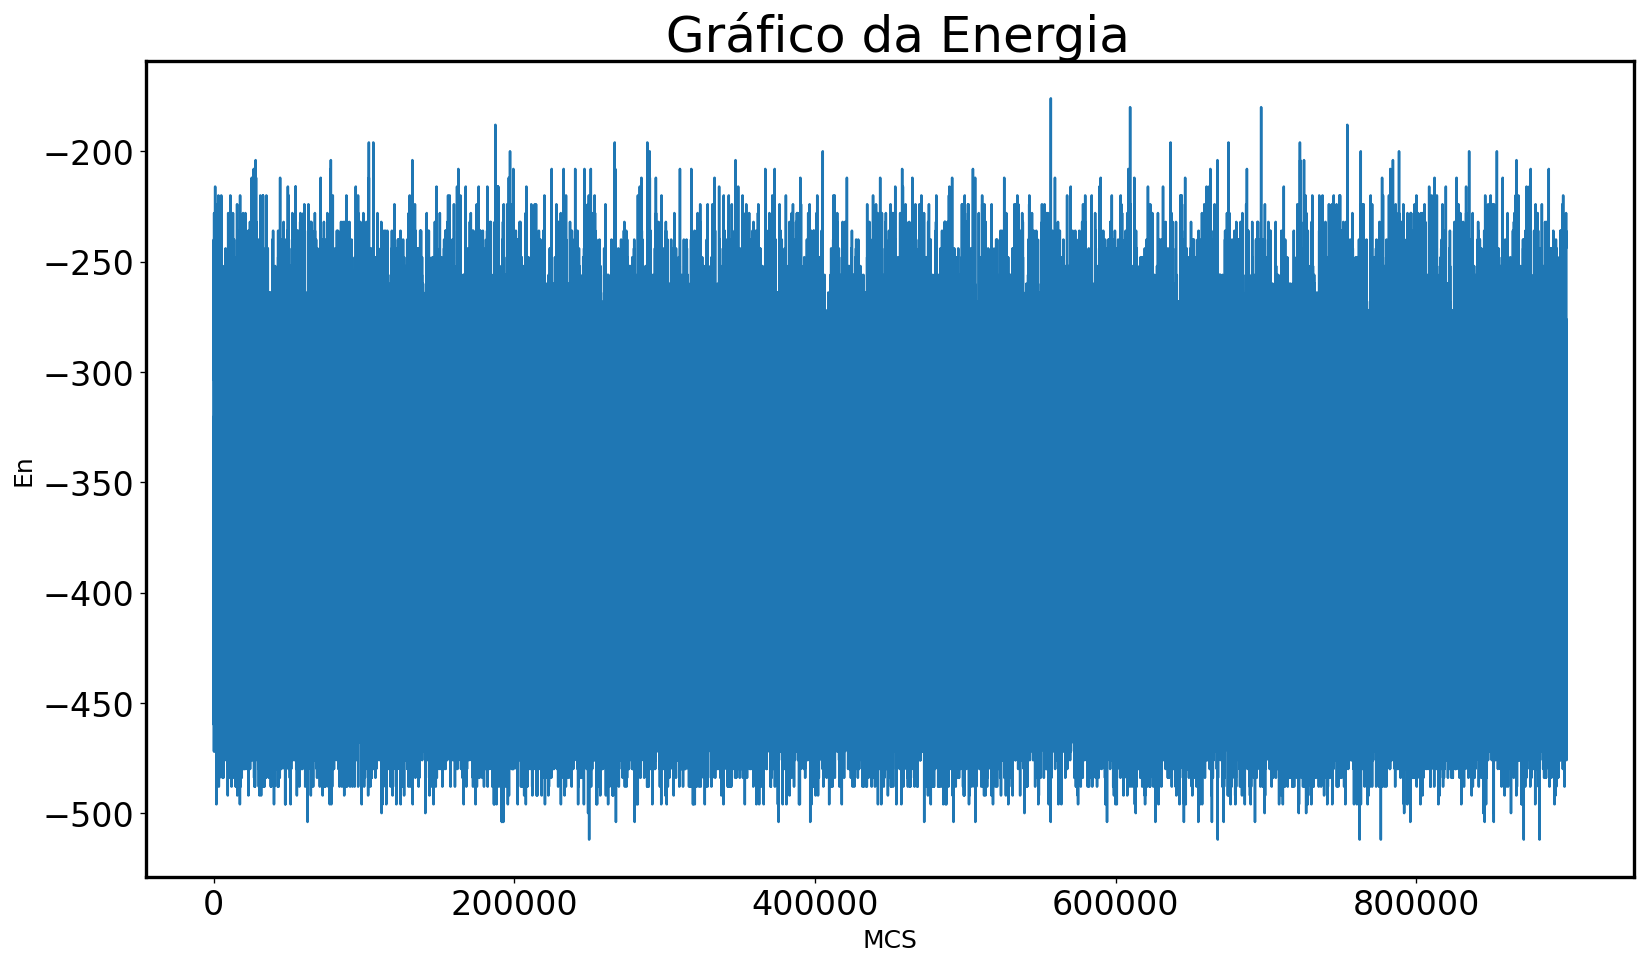

In [ ]:
#@title Gráfico da Energia
## PLOT EN ##
#configs
#-------------------------- PLT CONFIGS ----------------------------------------
fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.title(' Gráfico da Energia', fontsize=30)
plt.xlabel('MCS', fontsize=15)
plt.ylabel('En', fontsize=15)

#---------------------- CHART CONFIGURATION ------------------------------------
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)




plt.plot(medidas_en[10**5+1:], label='mag')
plt.show()

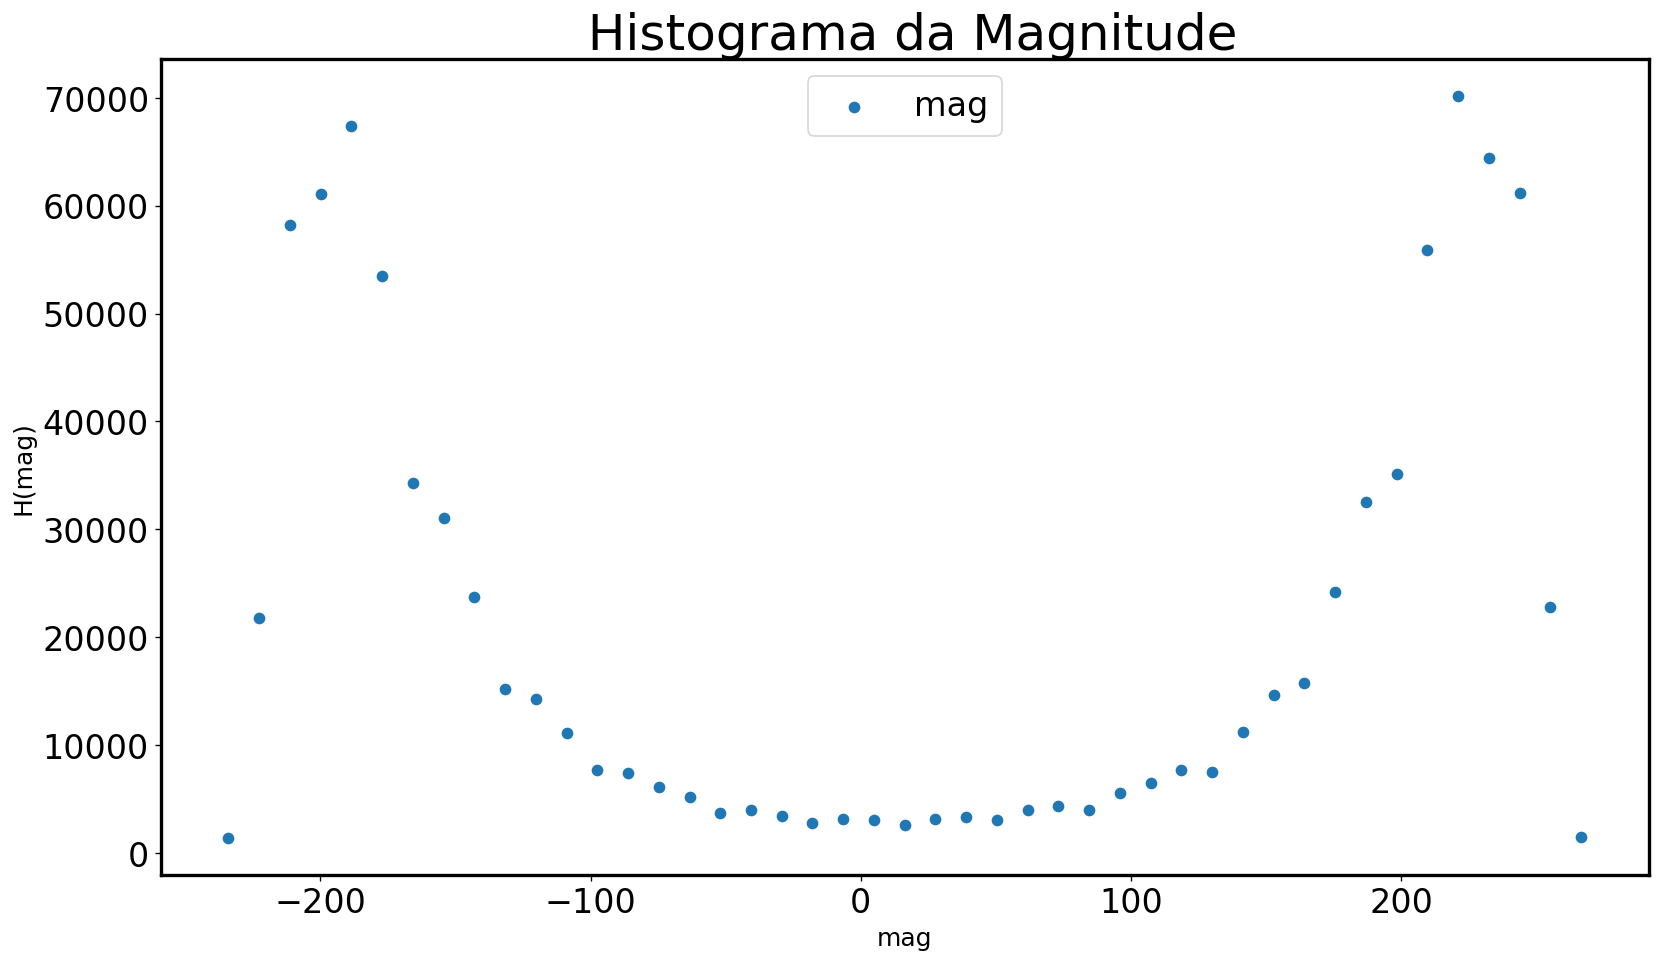

In [ ]:
#@title Histograma da Magnitude
## PLOT MAG HIST##
#configs
#-------------------------- PLT CONFIGS ----------------------------------------
fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.title(' Histograma da Magnitude', fontsize=30)
plt.xlabel('mag', fontsize=15)
plt.ylabel('H(mag)', fontsize=15)

#---------------------- CHART CONFIGURATION ------------------------------------
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

# histogram configs
n_bins = int(1 + 3.22*np.log(len(medidas_mag[10**5:]))) # sturge's rule
freqs, vals = np.histogram(medidas_mag[10**5:], n_bins)


plt.scatter(vals[:-1], freqs, label='mag')
plt.legend(loc='upper center', fontsize=20)
plt.show()

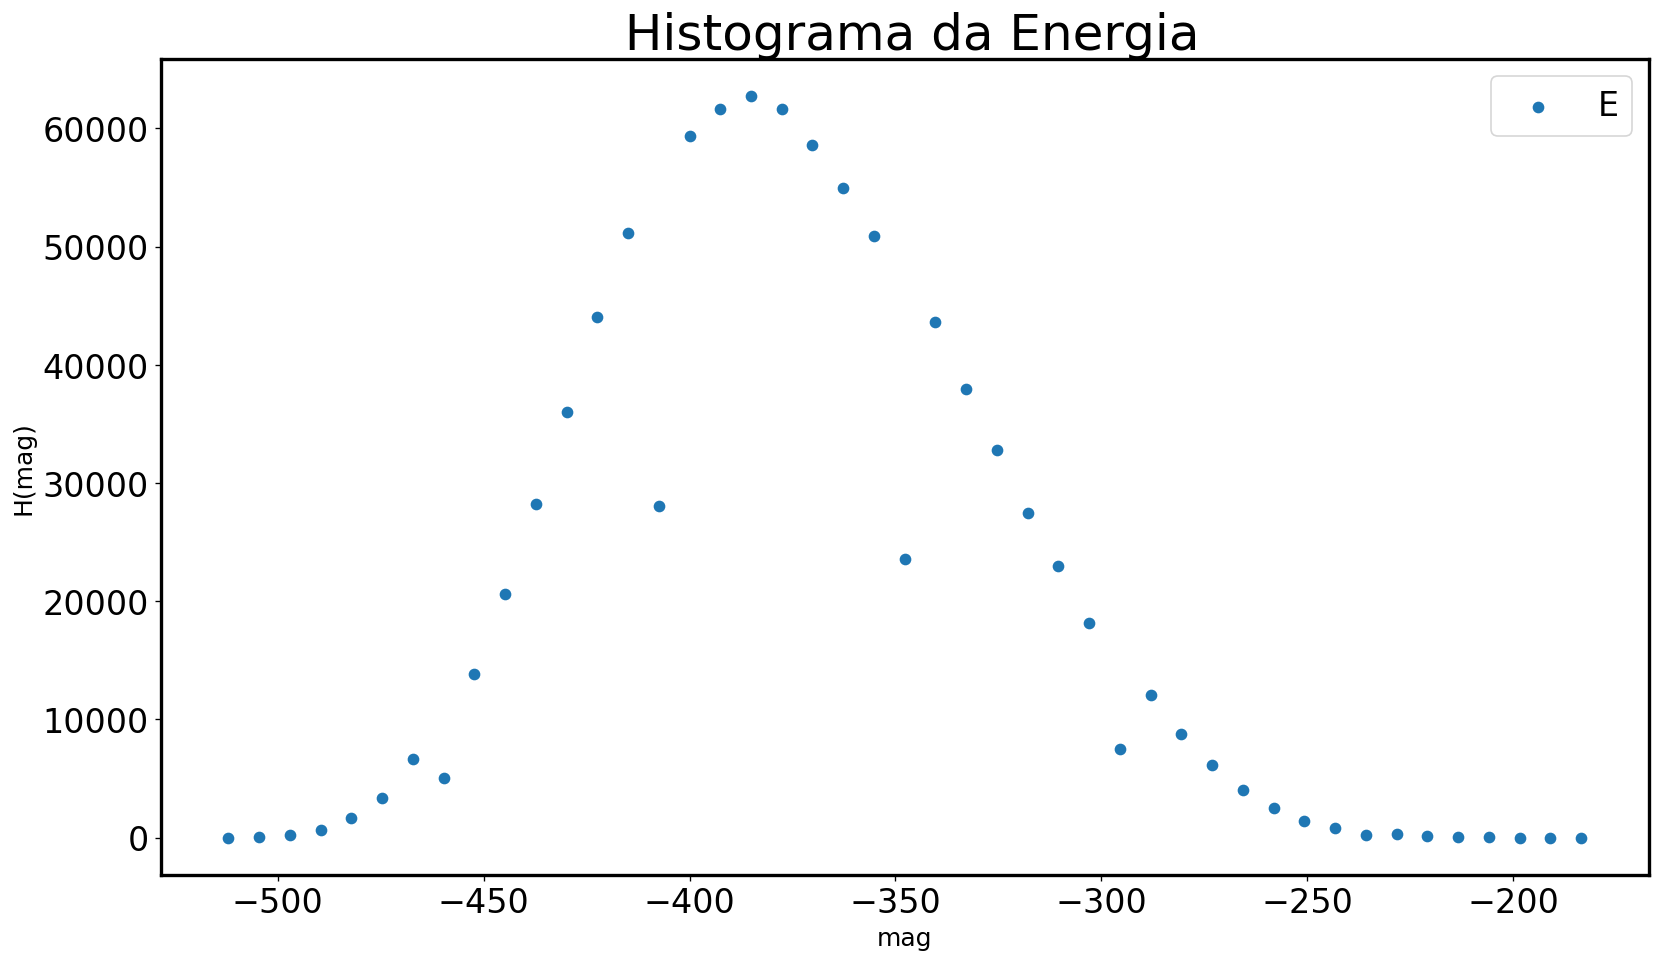

In [ ]:
#@title Histograma da Energia
## PLOT MAG HIST##
#configs
#-------------------------- PLT CONFIGS ----------------------------------------
fig, ax = plt.subplots(figsize=(16,9), dpi=120)
plt.title(' Histograma da Energia', fontsize=30)
plt.xlabel('mag', fontsize=15)
plt.ylabel('H(mag)', fontsize=15)

#---------------------- CHART CONFIGURATION ------------------------------------
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

# histogram configs
n_bins = int(1 + 3.22*np.log(len(medidas_en[10**5+1:]))) # sturge's rule
freqs_en, vals_en = np.histogram(medidas_en[10**5+1:], n_bins)


plt.scatter(vals_en[:-1], freqs_en, label='E')
plt.legend(loc='best', fontsize=20)
plt.show()

#**Modelo de Ising em Paralelo:**

## 1 - **@jit(nopython=True, parallel=True):** Paralelização pelo numba





In [ ]:
medidas_mag_p = np.zeros(TMAX, dtype=np.float32) # vetor com as medidas da magnitude em paralelo
medidas_en_p = np.zeros(TMAX, dtype=np.float32)  # vetor com as medidas da energia em paralelo
s_p = S.copy()


In [ ]:
!pip install tbb


In [ ]:
!pip install pyscenic

In [ ]:
## DINÂMICA EM PARALELO COM NUMBA ##
from numba import njit, config
config.THREADING_LAYER = 'threadsafe'
# função da dinâmica de MC
@njit(parallel=True)
def dinamica_p(s, medidas_mag, medidas_en):
    for temp in TEMP:
        E = 0 
        mag = np.sum(s)/L2 # definimos a mag dentro do loop com numba
        viz = init_viz(L2)  # iniciamos os vizinhos
        for i in range(L2):
          for j in range(4):
            E = E + s[i]*(s[viz[i][j]])
        E = E*(-1/2)       
        for t in range(TMAX):
            # rotina da dinamica
            for i in range(L2):
                sitio = np.random.randint(L2) # vou escolher um sitio aleatorio
                deltae = 2*s[sitio]*(s[viz[sitio,0]] + s[viz[sitio,1]] +s[viz[sitio,2]]+s[viz[sitio,3]])
                prob = np.exp(-deltae/temp)
                rfloat1 = npr(1)[0]  # num aleatorio [0,1) | npr() = numpy.random.random()
                if rfloat1 < prob: # if para flipar o sitio
                    s[sitio] = s[sitio]*(-1)
                    mag = mag + 2*s[sitio] # ajustamo a mag
                    E = E + deltae
            if t > 10**5:
              medidas_mag[t] = mag # salvando o valor da mag do passo t 
              medidas_en[t] = E    # salvando o valor da energia no passo t

In [ ]:
dinamica_p(s_p, medidas_mag_p, medidas_en_p)

parallel não funciona

#**Checkerboard**


In [ ]:
## LOOP PARA CRIAR O CHECKERBOARD ##
j = 0
m = 0
k = 0
b = 0
c = np.zeros((2, int(L2/2)), dtype=np.int64)
for i in range(L2):
  k = i/L
  b = k//2
  if b == 0:
    if i%2 == 0:
      c[0][j] = i
      j = j + 1 
    else:
      c[1][m] = i
      m = m + 1
  else:
    if i%2 == 0:
      c[1][m] = i
      m = m + 1
    else:
      c[0][j] = i
      j = j + 1

In [ ]:
print(c)

[[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  33  35
   37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
   73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
  109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143
  145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179
  181 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215
  217 219 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251
  253 255]
 [  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  32  34
   36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
   72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
  108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
  144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
  180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
  216 218 220 222 224 226 2

In [ ]:
medidas_mag_c = np.zeros(TMAX, dtype=np.float32) # vetor com as medidas da magnitude em paralelo + checkerboard
medidas_en_c = np.zeros(TMAX, dtype=np.float32)  # vetor com as medidas da energia em paralelo + checkerboard

In [ ]:

def dinamica_c(s, c, medidas_mag_c, medidas_en_c):
    for temp in TEMP:
        E = 0 
        mag = np.sum(s) # definimos a mag dentro do loop com numba
        viz = init_viz(L2)  # iniciamos os vizinhos
        for i in range(L2):
          for j in range(4):
            E = E + s[i]*(s[viz[i][j]])
        E = E*(-1/2)       
        for t in range(TMAX):
            # rotina da dinamica
            #loop nas cores
            for cor in range(2):
              for i in range(int(L2/2)):
                  sitio = c[cor][i] # vou "escolher" um sitio sequencial
                  deltae = 2*s[sitio]*(s[viz[sitio,0]] + s[viz[sitio,1]] +s[viz[sitio,2]]+s[viz[sitio,3]])
                  prob = np.exp(-deltae/temp)     # fazer uma matriz de resultados
                  rfloat1 = npr(1)[0]  # num aleatorio [0,1) | npr() = numpy.random.random()
                  if rfloat1 < prob: # if para flipar o sitio
                      s[sitio] = s[sitio]*(-1)
                      mag = mag + 2*s[sitio] # ajustamo a mag
                      E = E + deltae
                      medidas_mag_c[t] = mag # salvando o valor da mag do passo t 
                      medidas_en_c[t] = E    # salvando o valor da energia no passo t

In [ ]:
s_c = S.copy()
dinamica_c(s_c, c, medidas_mag_c, medidas_en_c)

In [ ]:
print(medidas_mag_c)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.